In [35]:
# импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Используется распределение хи-квадрат
Ссылка на распределение: https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

In [36]:
df = 4 # количество степеней сводобы распределения

#Создадим массив параметров, чтобы создать универсальный для всех распределений ноутбук
parameters = [df]

# Создаем распределение хи-квадрат
distribution = scipy.stats.chi2(parameters)

# Функция для определения мат ожидания, зависит от распределения
def calculate_mu(args):
    return args[0]

# Функция для определения дисперсии, зависит от распределения
def calculate_variance(args, n):
    return np.sqrt(2 * args[0] / n)

In [37]:
# генерируем выборку мощностью 1000
subset = distribution.rvs(1000)

# Теоретическая кривая плотности распределения
x = np.linspace(0, 20, 1000)
pdf = distribution.pdf(x)

Text(0.5, 1.0, '$\\chi$-square distribution')

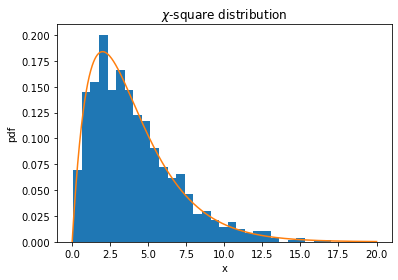

In [38]:
fig, ax = plt.subplots()
ax.hist(subset, density=True, bins=30)
ax.plot(x, pdf)
ax.set_xlabel('x')
ax.set_ylabel('pdf')

ax.set_title(r'$\chi$-square distribution')

In [39]:
number_of_subsets = 1000

In [40]:
# Функция, генерирующая выборку выборочных средних, в зависимости от размера исходной выборки
def generate_subset_means(sample_size):
    subset_means = list()
    for i in range(number_of_subsets):
        subset = np.array(distribution.rvs(sample_size))
        subset_means.append(subset.mean())
    return np.array(subset_means)

In [41]:
sample_size_1 = 5
sample_size_2 = 10
sample_size_3 = 50

In [42]:
dist_5 = np.array(generate_subset_means(sample_size_1))
dist_10 = np.array(generate_subset_means(sample_size_2))
dist_50 = np.array(generate_subset_means(sample_size_3))

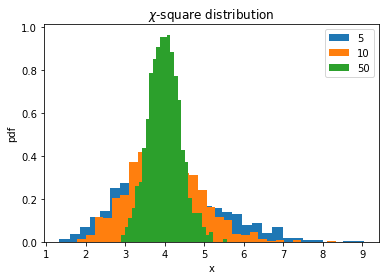

In [43]:
fig, ax = plt.subplots()
ax.hist(dist_5, density=True, label="5", bins=30)
ax.hist(dist_10, density=True, label="10", bins=30)
ax.hist(dist_50, density=True, label="50", bins=30)
ax.set_xlabel('x')
ax.set_ylabel('pdf')
ax.set_title(r'$\chi$-square distribution')
ax.legend()

Увеличение размера выборки приводит к уменьшению дисперсии плотности распределения

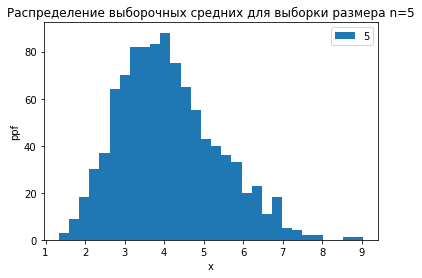

In [44]:
fig, ax = plt.subplots()
ax.hist(dist_5, label="5", bins=30)
ax.set_xlabel('x')
ax.set_ylabel('ppf')
ax.set_title('Распределение выборочных средних для выборки размера n=5')
ax.legend()

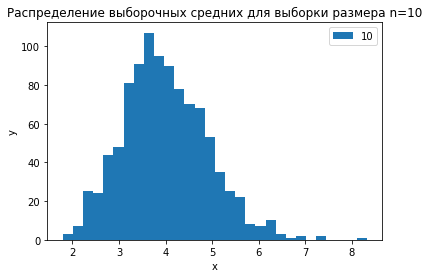

In [45]:
fig, ax = plt.subplots()
ax.hist(dist_10, label="10", bins=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Распределение выборочных средних для выборки размера n=10')
ax.legend()

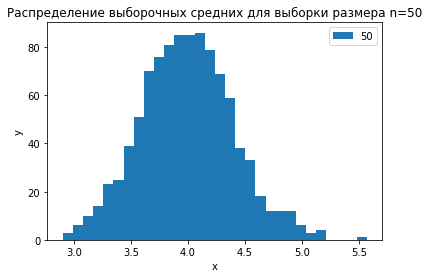

In [46]:
fig, ax = plt.subplots()
ax.hist(dist_50, label="50", bins=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Распределение выборочных средних для выборки размера n=50')
ax.legend()

Матожидание распределения хи-квадрат: 
mean = df.
Дисперсия распределения хи-квадрат:
variance = 2 * df

[]

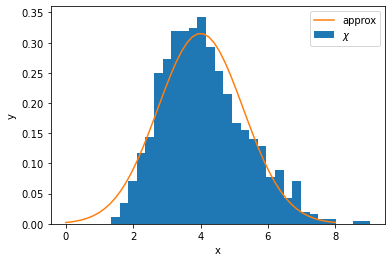

In [47]:
# распределение с размером выборки 5

mu = calculate_mu(parameters)
sigma = calculate_variance(parameters, 5)
normRv = scipy.stats.norm(loc=mu, scale=sigma)
x = np.linspace(0, 8)
pdf = normRv.pdf(x)

fig, ax = plt.subplots()
ax.hist(dist_5, density=True, bins=30, label=r'$\chi$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x, pdf, label='approx')
ax.legend()
ax.plot()


[]

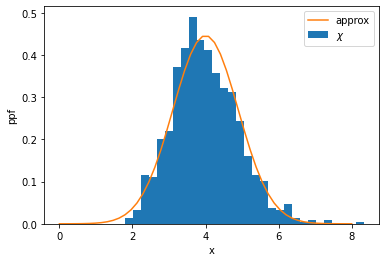

In [49]:
# распределение с размером выборки 10
mu = calculate_mu(parameters)
sigma = calculate_variance(parameters, 10)
normRv = scipy.stats.norm(loc=mu, scale=sigma)
x = np.linspace(0, 8)
pdf = normRv.pdf(x)

fig, ax = plt.subplots()
ax.hist(dist_10, density=True, bins=30, label=r'$\chi$')
ax.set_xlabel('x')
ax.set_ylabel('ppf')
ax.plot(x, pdf, label=r'approx')
ax.legend()
ax.plot()


0.4


[]

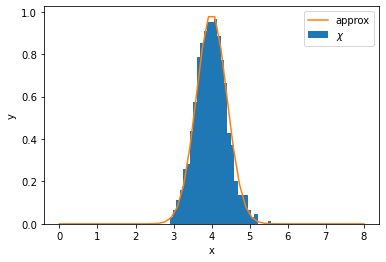

In [50]:
# распределение с размером выборки 50
mu = calculate_mu(parameters)
sigma = calculate_variance(parameters, 50)
print(sigma)
normRv = scipy.stats.norm(loc=mu, scale=sigma)
x = np.linspace(0, 8)
pdf = normRv.pdf(x)

fig, ax = plt.subplots()
ax.hist(dist_50, density=True, bins=30, label=r'$\chi$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x, pdf, label='approx')
ax.legend()
ax.plot()


Увеличение количества элементов выборке приводит к улучшению аппроксимации выборчных средних нормальным распределением с параметрами N($\mathbb{E}X, \frac{\mathbb{D}X}{\sqrt{n}}$)